In [2]:
using PyCall
using PyPlot

In [3]:
using DifferentialEquations

┌ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1273


In [4]:
spy = pyimport("scipy.interpolate")
np = pyimport("numpy")
mp = pyimport("mpmath")

PyObject <module 'mpmath' from '/home/arurz/.local/lib/python3.6/site-packages/mpmath/__init__.py'>

In [5]:
rc("text", usetex=true)

In [6]:
function k(t,κ)
    return 2*κ^2/cosh(κ*t)^2
end
;

In [7]:
κ1 = 0.3
κ2 = 0.4
κ3 = 0.5
;

In [8]:
function hyp1!(du,u,p,t)
 du[1] = u[2]
 du[2] = (1/u[1]^3)-k(t,κ1)*u[1]
 du[3] = (1/u[1]^2)
end

function hyp2!(du,u,p,t)
 du[1] = u[2]
 du[2] = (1/u[1]^3)-k(t,κ2)*u[1]
 du[3] = (1/u[1]^2)
end

function hyp3!(du,u,p,t)
 du[1] = u[2]
 du[2] = (1/u[1]^3)-k(t,κ3)*u[1]
 du[3] = (1/u[1]^2)
end
;

In [9]:
u1 = [3.33333333;0.0;0.0]
u2 = [2.5;0.0;0.0]
u3 = [2.0;0.0;0.0]
tspan = (0.0,20)

prob1 = ODEProblem(hyp1!,u1,tspan)
sol1 = solve(prob1,Vern7(),dt=0.00000000001)

prob2 = ODEProblem(hyp2!,u2,tspan)
sol2 = solve(prob2,Vern7(),dt=0.00000000001)

prob3 = ODEProblem(hyp3!,u3,tspan)
sol3 = solve(prob3,Vern7(),dt=0.00000000001)

;

In [10]:
t = np.linspace(np.min(sol1.t), np.max(sol1.t), 200)  

r1 = spy.make_interp_spline(sol1.t, sol1'[:,1], k=3)
r2 = spy.make_interp_spline(sol2.t, sol2'[:,1], k=3)
r3 = spy.make_interp_spline(sol3.t, sol3'[:,1], k=3)

dr1 = spy.make_interp_spline(sol1.t, sol1'[:,2], k=3)
dr2 = spy.make_interp_spline(sol2.t, sol2'[:,2], k=3)
dr3 = spy.make_interp_spline(sol3.t, sol3'[:,2], k=3)

om1 = spy.make_interp_spline(sol1.t, sol1'[:,3], k=3)
om2 = spy.make_interp_spline(sol2.t, sol2'[:,3], k=3)
om3 = spy.make_interp_spline(sol3.t, sol3'[:,3], k=3)

vr1 = r1(t)
vr2 = r2(t)
vr3 = r3(t)

vdr1 = dr1(t)
vdr2 = dr2(t)
vdr3 = dr3(t)

vom1 = om1(t)
vom2 = om2(t)
vom3 = om3(t)

;

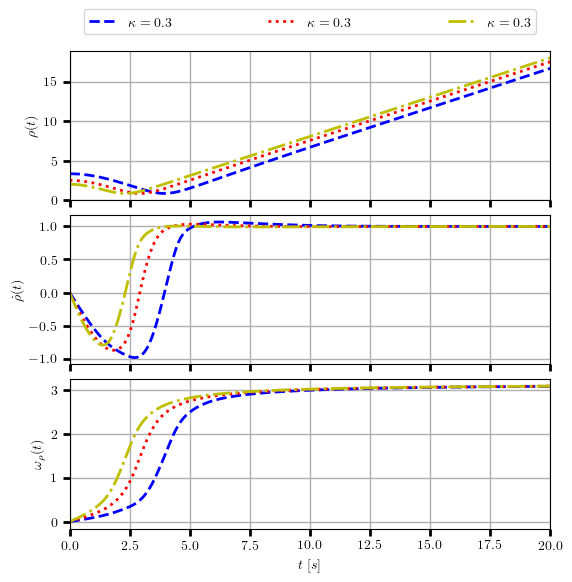

In [15]:
ww = 6.20
hh = ww

fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(ww,hh),sharex=true)
plt.subplots_adjust(hspace = 0.1)

ax1.plot(t,vr1,"b--", linewidth=2,label=L"\kappa=0.3")
ax2.plot(t,vdr1,"b--", linewidth=2)
ax3.plot(t,vom1,"b--", linewidth=2)

ax1.plot(t,vr2,"r:", linewidth=2,label=L"\kappa=0.3")
ax2.plot(t,vdr2,"r:", linewidth=2)
ax3.plot(t,vom2,"r:", linewidth=2)

ax1.plot(t,vr3,"y-.", linewidth=2,label=L"\kappa=0.3")
ax2.plot(t,vdr3,"y-.", linewidth=2)
ax3.plot(t,vom3,"y-.", linewidth=2)

ax1.set_aspect("auto")
ax2.set_aspect("auto")
ax3.set_aspect("auto")

ax3.set_xlim(0,20)

ax1.tick_params(direction="out",length=5,width=2,labelsize=10)
ax2.tick_params(direction="out",length=5,width=2,labelsize=10)
ax3.tick_params(direction="out",length=5,width=2,labelsize=10)

ax1.grid(linewidth=1)
ax2.grid(linewidth=1)
ax3.grid(linewidth=1)

ax1.set_ylabel(L"\rho(t)",fontsize=10)
ax2.set_ylabel(L"\dot{\rho}(t)",fontsize=10)
ax3.set_ylabel(L"\omega_{\rho}(t)",fontsize=10)

ax3.set_xlabel(L"t\ [s]",fontsize=10)

ax1.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=3, mode="expand", borderaxespad=1.0,fontsize=10)

show()

savefig("hypkvn_d.pdf", transparent = "true", dpi=300, bbox_inches="tight", pad_inches=0)

In [ ]:
function β11(t,ρ0)
    return convert(Float64,(ρ0/sol1'[t,1])*mp.cos(sol1'[t,3])+ρ0*sol1'[t,2]*mp.sin(sol1'[t,3]))
end

function β12(t,ρ0)
    return convert(Float64,ρ0*sol1'[t,1]*mp.sin(sol1'[t,3]))
end

function β13(t,ρ0,dρ0)
    return convert(Float64,(1/(ρ0*sol1'[t,1])+dρ0*sol1'[t,2])*mp.sin(sol1'[t,3])+((dρ0/sol1'[t,1])-(sol1'[t,2]/ρ0))*mp.cos(sol1'[t,3]))
end

function β14(t,ρ0,dρ0)
    return convert(Float64,(sol1'[t,1]/ρ0)mp.cos(sol1'[t,3])-dρ0*sol1'[t,1]*mp.cos(sol1'[t,3]))
end

function β21(t,ρ0)
    return convert(Float64,(ρ0/sol1'[t,1])*mp.cos(sol1'[t,3])+ρ0*sol1'[t,2]*mp.sin(sol1'[t,3]))
end

function β22(t,ρ0)
    return convert(Float64,ρ0*sol2'[t,1]*mp.sin(sol2'[t,3]))
end

function β23(t,ρ0,dρ0)
    return convert(Float64,(1/(ρ0*sol2'[t,1])+dρ0*sol2'[t,2])*mp.sin(sol2'[t,3])+((dρ0/sol2'[t,1])-(sol2'[t,2]/ρ0))*mp.cos(sol2'[t,3]))
end

function β24(t,ρ0,dρ0)
    return convert(Float64,(sol2'[t,1]/ρ0)mp.cos(sol2'[t,3])-dρ0*sol2'[t,1]*mp.cos(sol2'[t,3]))
end

;

In [ ]:
function qc1(q,p,t)
    return q*β11(t,u1[1])-p*β12(t,u1[1])
end
    
function pc1(q,p,t)
    return q*β13(t,u1[1],0)+p*β14(t,u1[1],0)
end

function qc2(q,p,t)
    return q*β21(t,u2[1])-p*β22(t,u2[1])
end
    
function pc2(q,p,t)
    return q*β23(t,u2[1],0)+p*β24(t,u1[1],0)
end

;

In [ ]:
qv1 = zeros(Float64,length(sol1.t))
for i in 1:length(sol1.t)
    qv1[i] = qc1(-3,3,i)
end
pv1 = zeros(Float64,length(sol1.t))
for i in 1:length(sol1.t)
    pv1[i] = pc1(-3,3,i)
end

qv2 = zeros(Float64,length(sol1.t))
for i in 1:length(sol1.t)
    qv2[i] = qc2(-3,3,i)
end
pv2 = zeros(Float64,length(sol1.t))
for i in 1:length(sol1.t)
    pv2[i] = pc2(-3,3,i)
end

In [ ]:
t1 = np.linspace(np.min(sol1.t), np.max(sol1.t), 200)  

sqc1 = spy.make_interp_spline(sol1.t, qv1, k=3)
spc1 = spy.make_interp_spline(sol1.t, pv1, k=3)
sqc2 = spy.make_interp_spline(sol1.t, qv2, k=3)
spc2 = spy.make_interp_spline(sol1.t, pv2, k=3)

vsqc1 = sqc1(t)
vspc1 = spc1(t)
vsqc2 = sqc2(t)
vspc2 = spc2(t)

;

In [ ]:
figps = figure(figsize=(5,5))
axps = gca(projection="3d")
plot3D(vsqc1,vsqc1,t1,"b--", linewidth=2)
plot3D(vsqc2,vsqc2,t1,"r:", linewidth=2)
axps.view_init(30,-30)
xlabel(L"q")
ylabel(L"p")
zlabel(L"t\ [s]")
axps.tick_params(axis="both",direction="out",length=10,width=3,grid_linewidth=3)
axps.set_zticks(range(0,stop=20,step=5))
axps.set_zticklabels([L"0",L"5",L"10",L"15",L"20"])
show()
tight_layout()